In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
beh_MainFolder = "..\Data\Behavior_Data\\"
figures_MainFolder = "..\Figures\Behavior\\"

In [3]:
subs = ['13', '16', '17', '18', '21', '23', '26', '28', '29', '30', '31', '32', '33', 
         '34', '35', '36', '38', '39', '40', '41', '42']
# ['13', '16', '17', '18', '21', '23', '26', '28', '29', '30', '31', '32', '33',
       # '34', '35', '36', '38', '39', '40', '41', '42']

print(len(subs))

21


In [4]:
blocks = [0,1,2]
congruency = [80, 90, 100]

# Initialization
accuracy_block = np.zeros((len(blocks), len(subs)))
confidence_block = np.zeros((len(blocks), len(subs)))
RT_resp_block = np.zeros((len(blocks), len(subs)))
RT_conf_block = np.zeros((len(blocks), len(subs)))

accuracy_all = [[None], [None], [None]]
confidence_all = [[None], [None], [None]]
RT_resp_all = [[], [], []]
RT_conf_all = [[], [], []]
conf_l_all = [[], [], []]

In [5]:
for i,s in enumerate(subs):
    
    p_id = str(s) # participant to analyze
    print(p_id)
    beh_folder = beh_MainFolder + 'P'+p_id+'\\'


    pitch_V = len(blocks)*[None]
    pitch_RT = len(blocks)*[None]
    conf_V = len(blocks)*[None]
    conf_RT = len(blocks)*[None]
    resp_V = len(blocks)*[None]
    corr_V = len(blocks)*[None]
    trials_responded = len(blocks)*[None]
    confidence_responded = len(blocks)*[None]

    for bl in blocks:
        print(bl)
        if os.path.exists(beh_folder + 'Responses_S' + p_id + '_Block'+str(bl)+ '.npy'):
            pitch_V[bl], pitch_RT[bl], conf_V[bl], conf_RT[bl], resp_V[bl], corr_V[bl] = np.load(beh_folder + 'Responses_S' + p_id + '_Block'+str(bl)+ '.npy', allow_pickle = True)
            rts_res = []
            rts = []
            corr = []
            for tr in np.arange(len(pitch_V[bl])):
                #pitch_RT[bl][tr] >
                if pitch_V[bl][tr] != None and len(pitch_V[bl][tr]) > 0: # If we have a response:
                    rts.append(pitch_RT[bl][tr])
                    rts_res.append(pitch_V[bl][tr])
                    corr.append(corr_V[bl][tr])

                #else:
                #    if pitch_V[bl][tr] != None:
                #        rts.append(np.nan)
                #        rts_res.append(np.nan)
                #        corr.append(np.nan)



            accuracy_block[bl, i] = len(np.where(np.array(corr) == 1.0)[0])/len(corr)
            RT_resp_all[bl].append(rts)
            RT_resp_block[bl, i] = np.nanmean(rts)

            rts_c = []
            conf = []
            for tr in np.arange(len(conf_RT[bl])):

                if conf_RT[bl][tr] > 0 and len(conf_V[bl][tr]) > 0: # If we have a response:
                    rts_c.append(conf_RT[bl][tr])
                #else:
                #    if conf_V[bl][tr] != None:
                #        rts_c.append(np.nan)

                if conf_V[bl][tr] and len(conf_V[bl][tr]) > 0: # If we have a response:
                    conf.append(int(conf_V[bl][tr][0]))

                #else:
                #    if conf_V[bl][tr] != None:
                #        conf.append(np.nan)



            confidence_block[bl,i] = np.nanmean(np.array(conf))
            print(conf)
            RT_conf_block[bl,i] = np.nanmean(np.array(rts_c))
            
            RT_conf_all[bl].append(rts_c)
            conf_l_all[bl].append(conf)

            #np.save(save_folder + 'beh_block' + str(bl), [corr, rts_res, rts, conf, rts_c])
            
        else:
            print("File not found")



13
0
[4, 2, 3, 1, 3, 3, 2, 3, 4, 4, 2, 4, 2, 1, 4, 2, 3, 2, 1, 4, 3, 2, 2, 1, 3, 4, 3, 2, 4, 3, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 3, 1, 4, 3, 3, 2, 3, 4, 2, 3, 2, 1, 3, 3, 4, 4, 2, 3, 1]
1
[2, 1, 4, 3, 3, 3, 2, 4, 2, 4, 3, 2, 3, 2, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 4, 3, 1, 2, 3, 4, 4, 4, 3, 3, 1, 4, 1, 2, 4, 4, 3, 4, 3, 2, 2, 2, 2, 2, 3, 4, 2, 4, 3, 2, 2]
2
[4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 1, 4, 4, 4, 1, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 1, 4, 4, 3, 3, 4]
16
0
[3, 2, 2, 3, 4, 3, 4, 3, 2, 3, 1, 2, 4, 2, 2, 3, 4, 3, 3, 1, 2, 4, 2, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 1, 3, 2, 1, 2, 3]
1
[2, 2, 3, 4, 3, 3, 3, 4, 3, 2, 2, 3, 2, 4, 3, 2, 1, 3, 3, 4, 4, 3, 1, 2, 2, 2, 4, 1, 2, 4, 3, 1, 1, 2, 1, 3, 2, 4, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 2, 1, 1, 2, 4, 1, 2, 1, 2, 1, 1, 1]
2
[2, 4, 2, 2, 4, 3, 1, 1, 3, 1, 2, 1, 2, 2, 3, 4, 2, 2, 2, 4, 4, 3, 3, 1, 4, 4, 4, 2, 3, 3

In [6]:
# add jitter to scatter plots
def rand_jitter(pos, arr):
    x_arr = []
    x = pos - 0.1
    for i in range(len(arr)):
        x_arr.append(x + np.random.randint(-50,50) / 1000)
        x = x + 0.1
        if x >= (pos + 0.19):
            x = pos - 0.1
    return x_arr

In [7]:

RT_resp_all[0] = [item for sublist in RT_resp_all[0] for item in sublist]
RT_resp_all[1] = [item for sublist in RT_resp_all[1] for item in sublist]
RT_resp_all[2] = [item for sublist in RT_resp_all[2] for item in sublist]

RT_conf_all[0] = [item for sublist in RT_conf_all[0] for item in sublist]
RT_conf_all[1] = [item for sublist in RT_conf_all[1] for item in sublist]
RT_conf_all[2] = [item for sublist in RT_conf_all[2] for item in sublist]

conf_l_all[0] = [item for sublist in conf_l_all[0] for item in sublist]
conf_l_all[1] = [item for sublist in conf_l_all[1] for item in sublist]
conf_l_all[2] = [item for sublist in conf_l_all[2] for item in sublist]



## Behavioral Results

In [8]:
# Color palette for omissions:
ColorsL = np.array(([194,165,207], [118,42,131], [64,0,75]))/256

# y axis values for all the plots
y=np.arange(len(subs))

#### 1) Behavior RT

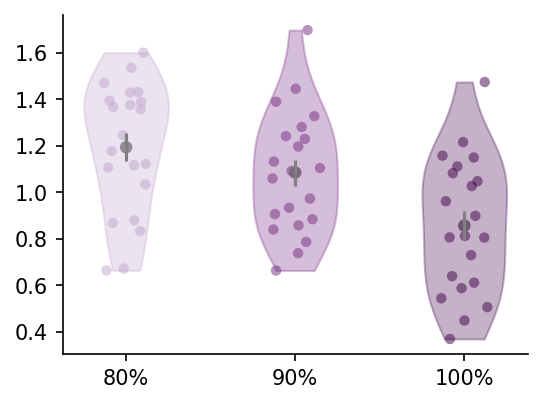

In [9]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)

# Add jitter and plot scatter plot
for gr_i, gr in enumerate(RT_resp_block):
    ax.scatter( rand_jitter((gr_i) * 1, gr), np.sort(gr), color='none', facecolors = ColorsL[gr_i], 
               alpha = .5, s = 25) #, label = group_name[x_i])
    
    plt.scatter(x=gr_i, y=np.mean(gr), color='none', facecolors='grey')
    yerr=[np.std(gr)/np.sqrt(len(gr))]
    plt.errorbar(x=gr_i,  y=np.mean(gr), yerr=yerr, c='grey')

# Plot distribuion of results with violin plot
violin_parts = plt.violinplot([RT_resp_block[0], RT_resp_block[1], RT_resp_block[2]], 
                              positions = [0, 1, 2],
                              vert=True, showmeans=False, showextrema=False)

for ind, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(ColorsL[ind])
    pc.set_edgecolor(ColorsL[ind])
    pc.set_color(ColorsL[ind])
    pc.set_alpha(0.3)

    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([0,1,2], ['80%','90%','100%'])

fig1 = plt.gcf() # get current figure
#fig1.savefig(figures_MainFolder + 'Beh_RT_Resp.png', bbox_inches='tight')
plt.show()

#### 2) Behavioral Responses

In [10]:
#save accuracy values
np.save(beh_MainFolder+'accuracies_block.npy', accuracy_block)


gr_i:  0
gr_i:  1
gr_i:  2


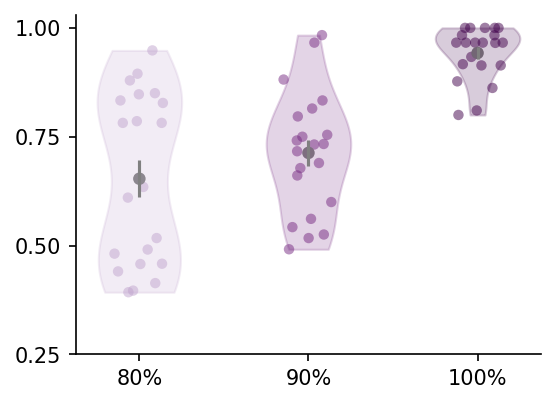

In [11]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)

# Add jitter and plot scatter plot
for gr_i, gr in enumerate(accuracy_block):
    print('gr_i: ', gr_i)
    ax.scatter( rand_jitter((gr_i) * 1, gr), np.sort(gr), color = 'none', facecolors = ColorsL[gr_i], 
               alpha = .5, s = 25) #, label = group_name[x_i])
    
    
    plt.scatter(x=gr_i, y=np.mean(gr), color='none', facecolors='grey')
    yerr=[np.std(gr)/np.sqrt(len(gr))]
    plt.errorbar(x=gr_i,  y=np.mean(gr), yerr=yerr, c='grey')

# Plot distribuion of results with violin plot
violin_parts = plt.violinplot([accuracy_block[0], accuracy_block[1], accuracy_block[2]], 
                              positions = [0, 1, 2], vert=True,
                              showmeans=False, showextrema=False)

for ind, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(ColorsL[ind])
    pc.set_edgecolor(ColorsL[ind])
    pc.set_color(ColorsL[ind])
    pc.set_alpha(0.2)


plt.xticks([0,1,2], ['80%','90%','100%'])
plt.ylim(ymin=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([0.25 ,0.5 ,0.75, 1])

fig1 = plt.gcf() # get current figure
#fig1.savefig(figures_MainFolder + 'Beh_Correct.png', bbox_inches='tight')
plt.show()

In [12]:
accuracy_block[:,3]

array([0.48148148, 0.51724138, 1.        ])

In [13]:
accuracy_block.shape

(3, 21)

#### 3) Confidence RT

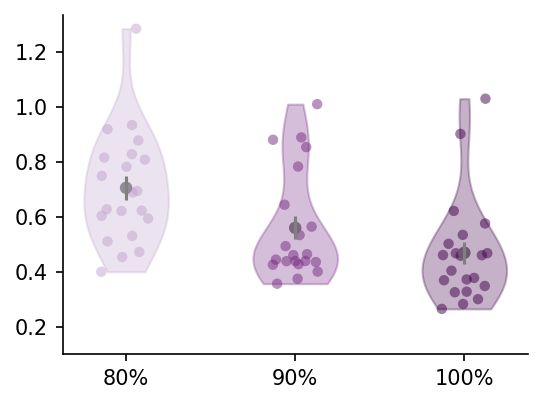

In [14]:

fig, ax = plt.subplots(figsize=(4,3), dpi=150)

# Add jitter and plot scatter plot
for gr_i, gr in enumerate(RT_conf_block):
    ax.scatter( rand_jitter((gr_i) * 1, gr), np.sort(gr), color='none', facecolors = ColorsL[gr_i], 
               alpha = .5, s = 25) #, label = group_name[x_i])
    
    
    plt.scatter(x=gr_i, y=np.mean(gr), color='none', facecolors='grey')
    yerr=[np.std(gr)/np.sqrt(len(gr))]
    plt.errorbar(x=gr_i,  y=np.mean(gr), yerr=yerr, c='grey')
    
# Plot distribuion of results with violin plot    
violin_parts = plt.violinplot([RT_conf_block[0], RT_conf_block[1], RT_conf_block[2]], 
                              positions = [0, 1, 2], vert=True,
                              showmeans=False, showextrema=False)

for ind, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(ColorsL[ind])
    pc.set_edgecolor(ColorsL[ind])
    pc.set_color(ColorsL[ind])
    pc.set_alpha(0.3)

plt.ylim(ymin=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([0,1,2], ['80%','90%','100%'])

fig1 = plt.gcf() # get current figure
#fig1.savefig(figures_MainFolder + 'Beh_RT_Conf.png', bbox_inches='tight')
plt.show()

#### 4) Confidence Responses

In [15]:
# save confidence values
np.save(beh_MainFolder+'confidence_block.npy', confidence_block)

gr_i:  0
3.9482758620689653
gr_i:  1
3.966666666666667
gr_i:  2
3.9482758620689653


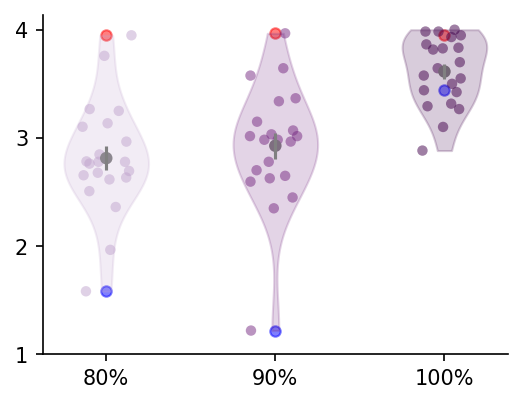

In [16]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)

# Add jitter and plot scatter plot
for gr_i, gr in enumerate(confidence_block):
    print('gr_i: ', gr_i)
    print(gr[19]) # 19 and 3 are outliiers from metad
    ax.scatter(gr_i, gr[19], color='r', alpha = .5, s = 25)
    #ax.scatter(gr_i, gr[3], color='b', alpha = .5, s = 25) -- > no 3 seems normal
    ax.scatter(gr_i, gr[18], color='b', alpha = .5, s = 25)
    ax.scatter( rand_jitter((gr_i) * 1, gr), np.sort(gr), color = 'none', facecolors = ColorsL[gr_i], 
               alpha = .5, s = 25) #, label = group_name[x_i])
    
    
    plt.scatter(x=gr_i, y=np.mean(gr), color='none', facecolors='grey')
    yerr=[np.std(gr)/np.sqrt(len(gr))]
    plt.errorbar(x=gr_i,  y=np.mean(gr), yerr=yerr, c='grey')

# Plot distribuion of results with violin plot
violin_parts = plt.violinplot([confidence_block[0], confidence_block[1], confidence_block[2]], 
                              positions = [0, 1, 2], vert=True,
                              showmeans=False, showextrema=False)

for ind, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(ColorsL[ind])
    pc.set_edgecolor(ColorsL[ind])
    pc.set_color(ColorsL[ind])
    pc.set_alpha(0.2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylim(ymin=0.3)
plt.yticks([1, 2, 3, 4])
plt.xticks([0,1,2], ['80%','90%','100%'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig1 = plt.gcf() # get current figure
#fig1.savefig(figures_MainFolder + 'Beh_Confidence.png', bbox_inches='tight')
plt.show()

In [17]:
confidence_block.shape

(3, 21)

In [18]:
confidence_block[:,19]

array([3.94827586, 3.96666667, 3.94827586])

In [ ]:
from scipy.stats.mstats import kruskalwallis

f,p = kruskalwallis([accuracy_block[0], accuracy_block[1], accuracy_block[2]])
print("Accuracy_sign: " + str(p))
if p <= 0.05:
    print('significant!')
else:
     print('not significant!')

f,p = kruskalwallis([RT_conf_block[0], RT_conf_block[1], RT_conf_block[2]])
print("Confidence RT: " + str(p))
if p <= 0.05:
    print('significant!')
else:
     print('not significant!')
        
f,p = kruskalwallis([RT_resp_block[0], RT_resp_block[1], RT_resp_block[2]])
print("Response RT: " + str(p))
if p <= 0.05:
    print('significant!')
else:
     print('not significant!')

f,p = kruskalwallis([confidence_block[0], confidence_block[1], confidence_block[2]])
print("Confidence: " + str(p))
if p <= 0.05:
    print('significant!')
else:
     print('not significant!')
        

In [ ]:
confidence_block[0]

Means

In [ ]:
print('Mean accuracy response times')
print(np.mean(RT_resp_all[0]))
print(np.std(RT_resp_all[0])/np.sqrt(len(RT_resp_all[0])))
      
print(np.mean(RT_resp_all[1]))
print(np.std(RT_resp_all[1])/np.sqrt(len(RT_resp_all[1])))
      
print(np.mean(RT_resp_all[2]))
print(np.std(RT_resp_all[2])/np.sqrt(len(RT_resp_all[2])))
      



In [ ]:
print('Mean accuracy')
print(np.mean(accuracy_block[0]))
print(np.std(accuracy_block[0])/np.sqrt(len(accuracy_block[0])))
      
print(np.mean(accuracy_block[1]))
print(np.std(accuracy_block[1])/np.sqrt(len(accuracy_block[1])))
      
print(np.mean(accuracy_block[2]))
print(np.std(accuracy_block[2])/np.sqrt(len(accuracy_block[2])))

In [ ]:
print('Mean confidence response times')
print(np.mean(RT_conf_all[0]))
print(np.std(RT_conf_all[0])/np.sqrt(len(RT_conf_all[0])))
      
print(np.mean(RT_conf_all[1]))
print(np.std(RT_conf_all[1])/np.sqrt(len(RT_conf_all[1])))
      
print(np.mean(RT_conf_all[2]))
print(np.std(RT_conf_all[2])/np.sqrt(len(RT_conf_all[2])))

In [ ]:
print('Mean confidence')
print(np.mean(conf_l_all[0]))
print(np.std(conf_l_all[0])/np.sqrt(len(conf_l_all[0])))
      
print(np.mean(conf_l_all[1]))
print(np.std(conf_l_all[1])/np.sqrt(len(conf_l_all[1])))
      
print(np.mean(conf_l_all[2]))
print(np.std(conf_l_all[2])/np.sqrt(len(conf_l_all[2])))    
